# Workshop QUIZ Identification of User Segments 

## Introduction

Reference: Danish Harron: "Python Machine Learning Case Studies" Chapter 1. 2017.

This workshop reviews the concepts of statistics and probability and gets students/participants to familiar with some Python code for the data analytics been used later for A/B Test applications.

The case here about two staff assigned with the task of determining the brand persona for a new cycle share scheme.

#### The analytics is used to present their results at the annual broad meeting on the 31st December 2016 in order to lay out a proposal to separate treatment on users. Do you agree with their conclusions. What else you can suggest?

The following libraries are imported to do the calculation (Make use of other people open source codes to develop the algorithm for particular application)

Jupyter notebook is the interface platform for Python high level programme language that one can insert explanations and the codes, along the context as a document so that any readers can follow through the usage of the code and understand the underlying procedures.  Jupyter notebook is very common for python data scientist for mutual reference.    

In [1]:
%matplotlib inline
import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy 
import scipy.stats as st
from scipy import stats
import seaborn as sns

## Python libraries: 

random, datetime for common language program function

pandas for data file  or database manilpulation

seaborn for data visulation

statistics, numpy and scipy are for statistical and mathematical formula/function

#### Understand the dataset 

There are always several steps to do with the dataset
1. Load the dataset
2. Check the dimension of the data file
3. Check the time frame
4. Look into features of different variables such as age, gender and usertype

In [2]:
data = pd.read_csv('trip_full.csv')

In [3]:
print(len(data))
data.head()

236065


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [4]:
# variable types
data.dtypes

trip_id                int64
starttime             object
stoptime              object
bikeid                object
tripduration         float64
from_station_name     object
to_station_name       object
from_station_id       object
to_station_id         object
usertype              object
gender                object
birthyear            float64
dtype: object

In [5]:
data = data.sort_values(by='starttime')
data.reset_index()
print('Date range of dataset: %s - %s'%(data.loc[1, 'starttime'], data.loc[len(data)-1, 'stoptime']))

Date range of dataset: 10/13/2014 10:32 - 9/1/2016 0:20


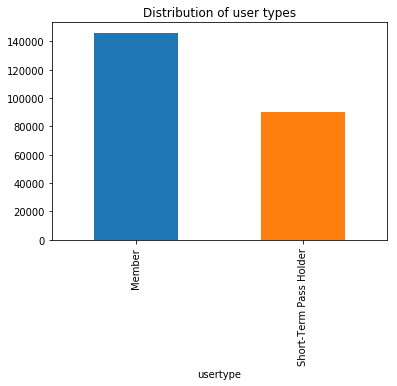

In [6]:
groupby_user = data.groupby('usertype').size()
groupby_user.plot.bar(title = 'Distribution of user types')

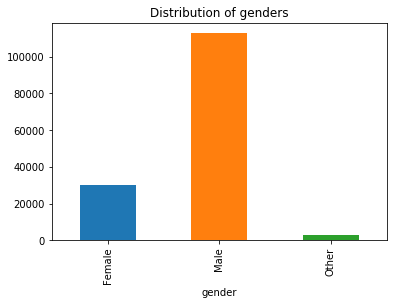

In [7]:
groupby_gender = data.groupby('gender').size()
groupby_gender.plot.bar(title = 'Distribution of genders')

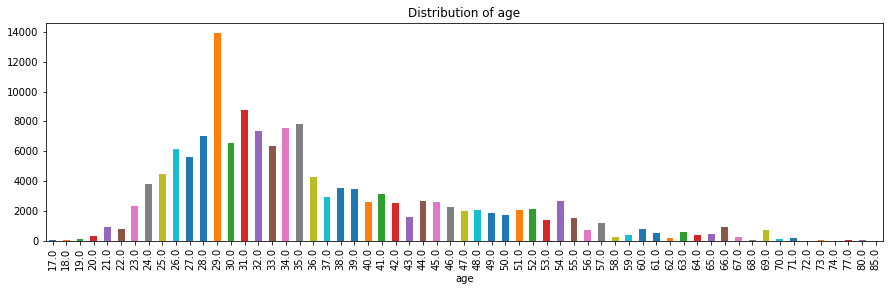

In [8]:
data["age"] = 2016 - data.birthyear
data = data.sort_values(by='age')
groupby_age = data.groupby('age').size()
groupby_age.plot.bar(title = 'Distribution of age', figsize = (15,4))

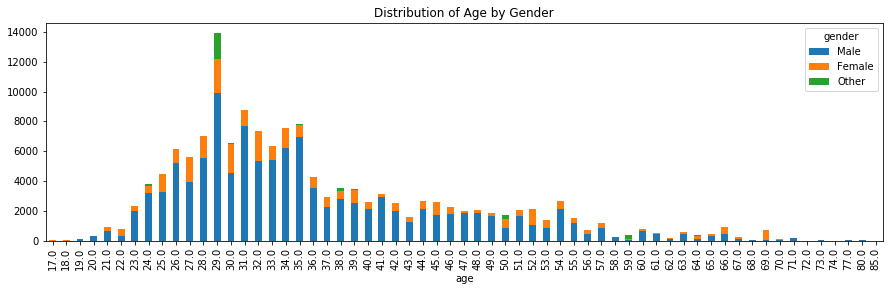

In [9]:
groupby_age_gender = data.groupby(['age', 'gender'])['age'].count().unstack('gender').fillna(0)
groupby_age_gender[['Male','Female','Other']].plot.bar(title = 'Distribution of Age by Gender', stacked=True, figsize = (15,4))

##### Select a particular age group
Concentrate on age group between 17 (birthyear 1999) and 39 (birthyear 1977)

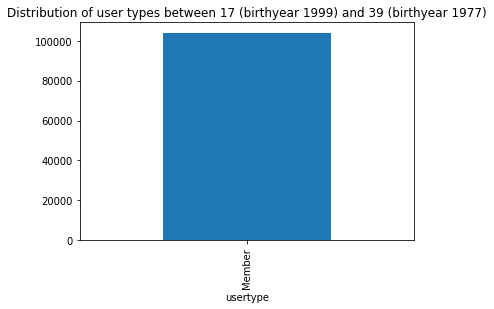

In [10]:
data_adult = data[(data['birthyear'] >= 1977) & (data['birthyear']<=1999)]
groupby_adult = data_adult.groupby('usertype').size()
groupby_adult.plot.bar(title = 'Distribution of user types between 17 (birthyear 1999) and 39 (birthyear 1977)')

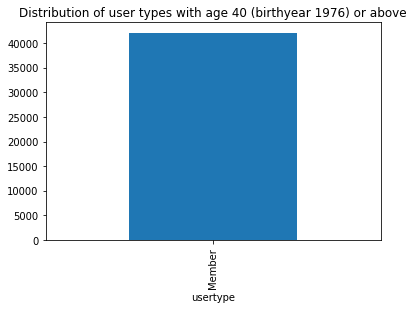

In [11]:
data_elderly = data[(data['birthyear']<1977)]
groupby_elderly = data_elderly.groupby('usertype').size() 
groupby_elderly.plot.bar(title = 'Distribution of user types with age 40 (birthyear 1976) or above')

Why there is no user of short-term pass holders in the graphs above?

Check about the missing observation in some particular types of users

In [12]:
data[data['usertype']=='Short-Term Pass Holder']['age'].isnull().values.sum()

89894

In [13]:
data[data['usertype']=='Short-Term Pass Holder']['gender'].isnull().values.sum()

89894

In [14]:
data[data['usertype']=='Short-Term Pass Holder'].shape

(89894, 13)

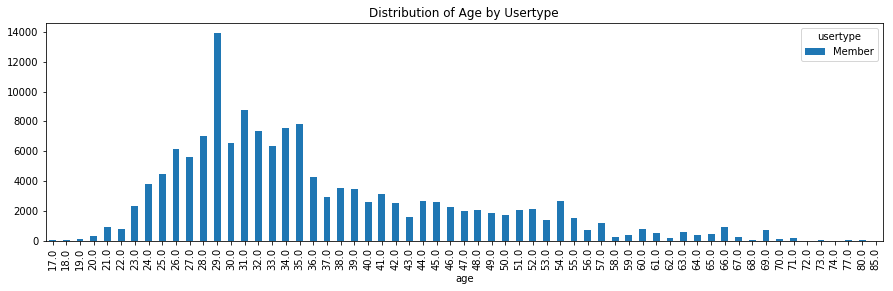

In [15]:
groupby_age_user = data.groupby(['age', 'usertype'])['age'].count().unstack('usertype').fillna(0)
groupby_age_user[['Member']].plot.bar(title = 'Distribution of Age by Usertype', stacked=True, figsize = (15,4))

###  Look into the pattern of the turnover of the trips and tripduration

At first convert t time column of the dataframe into a list. Next convert the string dates into python datetime objects then convert the list into a series object and converted the dates from datetime object to pandas date object. The time components of year, month, day and hour were derived from the list with the datetime objects.


In [16]:
List_ = list(data['starttime'])
List_ = [datetime.datetime.strptime(x, "%m/%d/%Y %H:%M") for x in List_]
data['starttime_mod'] = pd.Series(List_,index=data.index)
data['starttime_date'] = pd.Series([x.date() for x in List_],index=data.index)
data['starttime_year'] = pd.Series([x.year for x in List_],index=data.index)
data['starttime_month'] = pd.Series([x.month for x in List_],index=data.index)
data['starttime_day'] = pd.Series([x.day for x in List_],index=data.index)
data['starttime_hour'] = pd.Series([x.hour for x in List_],index=data.index)

#### Trend of turnover of tripduration over time.  Do you see a specific pattern?

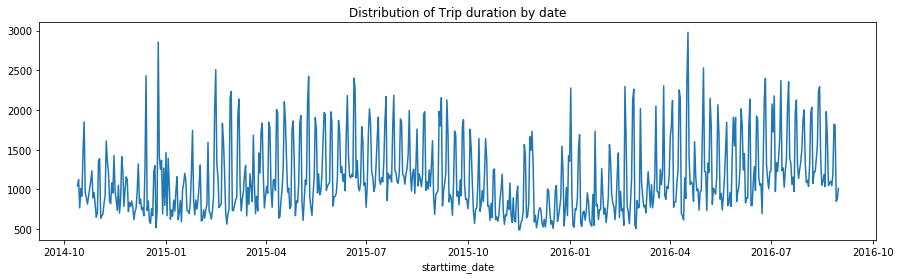

In [17]:
data.groupby('starttime_date')['tripduration'].mean().plot.line(title = 'Distribution of Trip duration by date', figsize = (15,4))

#### Trend of turnover of trips over time

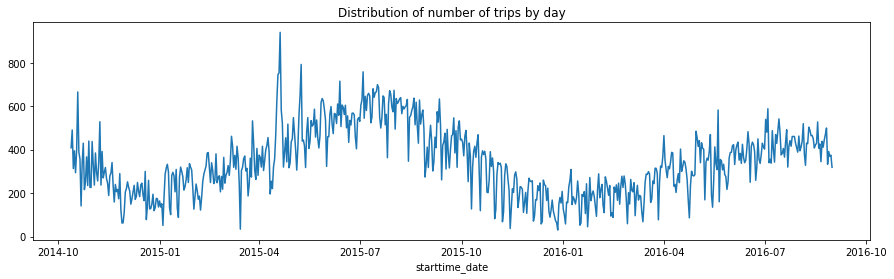

In [18]:
data.groupby('starttime_date')['trip_id'].count().plot.line(title = 'Distribution of number of trips by day', figsize = (15,4))

#### Distribution of number of trips by year.  Do you see a specific pattern?

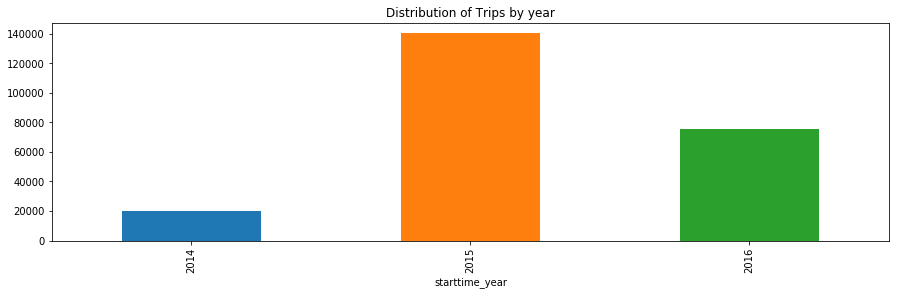

In [19]:
data.groupby('starttime_year')['trip_id'].count().plot.bar(title = 'Distribution of Trips by year', figsize = (15,4))

#### Distribution of number of trips by month.  Do you see a specific pattern?

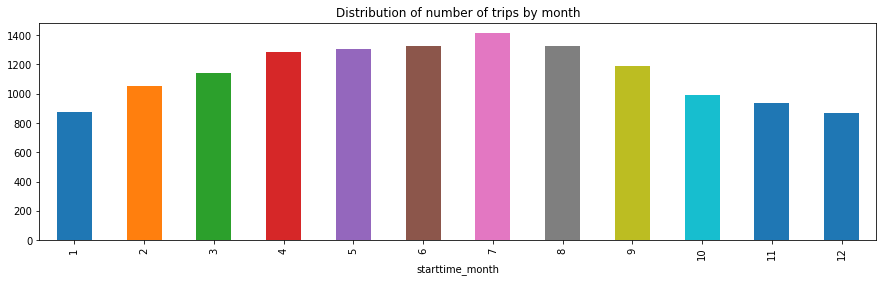

In [20]:
data.groupby('starttime_month')['tripduration'].mean().plot.bar(title = 'Distribution of number of trips by month', figsize = (15,4))

#### Distribution of number of trips by month-day.  Do you see a specific pattern?

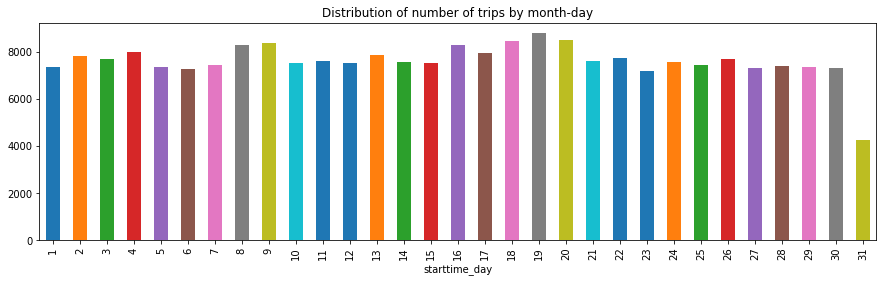

In [21]:
data.groupby('starttime_day')['trip_id'].count().plot.bar(title = 'Distribution of number of trips by month-day', figsize = (15,4))

#### Determine the distribution of number of trips by day hour.  Do you see a specific pattern?

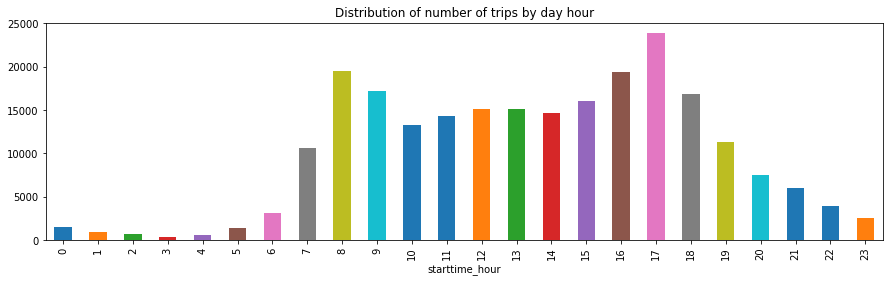

In [22]:
data.groupby('starttime_hour')['trip_id'].count().plot.bar(title = 'Distribution of number of trips by day hour', figsize = (15,4))

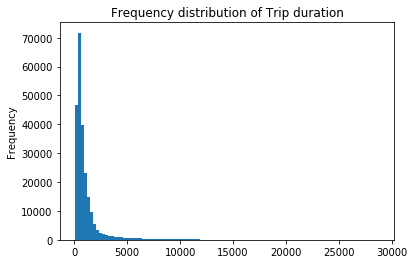

In [23]:
data['tripduration'].plot.hist(bins=100, title='Frequency distribution of Trip duration')
plt.show()

C:\Users\Victorius\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


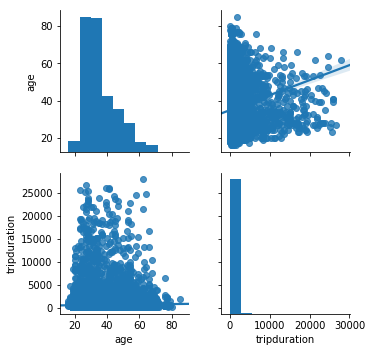

In [24]:
data = data.dropna()
data['age'] = data['starttime_year'] - data['birthyear']
sns.pairplot(data, vars=['age', 'tripduration'], kind='reg')
plt.show()

In [25]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)

correlations = data[['tripduration','age']].corr(method='pearson')
print(correlations)

              tripduration    age
tripduration         1.000  0.058
age                  0.058  1.000


#### Quiz Question Test about the trip number and trip duration with respect to different groups of users with respect to
1. month
2. hour of the day

In [26]:
data = pd.read_csv('trip_full.csv')
#
List_ = list(data['starttime'])
#
List_ = [datetime.datetime.strptime(x, "%m/%d/%Y %H:%M") for x in List_]
data['starttime_mod'] = pd.Series(List_,index=data.index)
data['starttime_date'] = pd.Series([x.date() for x in List_],index=data.index)
data['starttime_year'] = pd.Series([x.year for x in List_],index=data.index)
data['starttime_month'] = pd.Series([x.month for x in List_],index=data.index)
data['starttime_day'] = pd.Series([x.day for x in List_],index=data.index)
data['starttime_hour'] = pd.Series([x.hour for x in List_],index=data.index)
data.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,starttime_mod,starttime_date,starttime_year,starttime_month,starttime_day,starttime_hour
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0,2014-10-13 10:31:00,2014-10-13,2014,10,13,10
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0,2014-10-13 10:32:00,2014-10-13,2014,10,13,10
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0,2014-10-13 10:33:00,2014-10-13,2014,10,13,10
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0,2014-10-13 10:34:00,2014-10-13,2014,10,13,10
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0,2014-10-13 10:34:00,2014-10-13,2014,10,13,10


In [27]:
for cat in ['gender','usertype']:

    print('Category: %s\n'%cat)
    groupby_category = data.groupby(['starttime_hour', cat])['tripduration'].sum().unstack(cat)
    groupby_category = groupby_category.dropna()
    category_names = list(groupby_category.columns)

    for comb in [(category_names[i],category_names[j]) for i in range(len(category_names)) for j in range(i+1, len(category_names))]:

        print('%s %s'%(comb[0], comb[1]))
        t_statistics = stats.ttest_ind(list(groupby_category[comb[0]]), list(groupby_category[comb[1]]))
        print('Statistic: %f, P value: %f'%(t_statistics.statistic, t_statistics.pvalue))
        print('\n')

Category: gender

Female Male
Statistic: -3.656395, P value: 0.000679


Female Other
Statistic: 5.285166, P value: 0.000004


Male Other
Statistic: 5.596310, P value: 0.000001


Category: usertype

Member Short-Term Pass Holder
Statistic: -2.646712, P value: 0.011091




Check whether it can applied the Central Limit Theorem

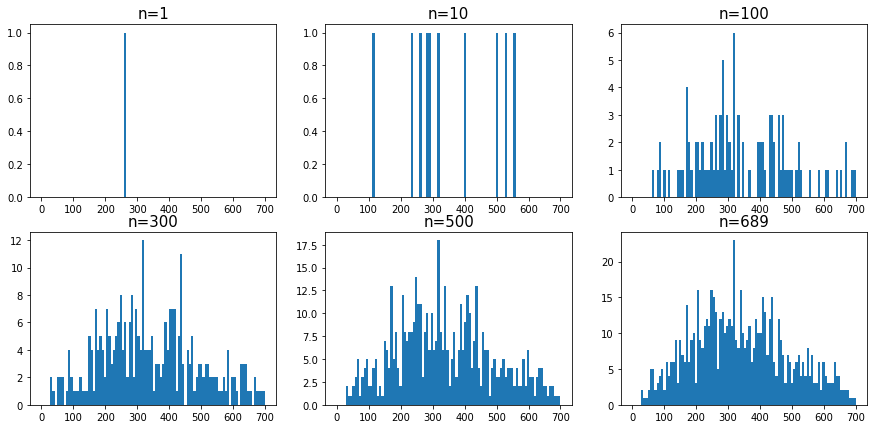

In [28]:
daily_tickets = list(data.groupby('starttime_date').size())
sample_tickets = []
checkpoints = [1, 10, 100, 300, 500, 1000]
plot_count = 1

random.shuffle(daily_tickets)

plt.figure(figsize=(15,7))
binrange=np.array(np.linspace(0,700,101))

for i in range(1000):
    if daily_tickets:
        sample_tickets.append(daily_tickets.pop())

    if i+1 in checkpoints or not daily_tickets:
        plt.subplot(2,3,plot_count)
        plt.hist(sample_tickets, binrange)
        plt.title('n=%d' % (i+1),fontsize=15)        
        plot_count+=1

    if not daily_tickets:
        break
        
plt.show()

### Conclusion: Marketing plan targeting to different genders should be started at ________ time, however different types of users should also be treated _______  with respect to their different usage patterns.

### Check Outliners

#### Check the Randomness of the sample in terms of gender

In [29]:
# H0:  the sequence was produced in a random manner
# Ha:  the sequence was not produced in a random manner  


# Assuming number of runs greater than 10
def runs_test(d, v, alpha = 0.05):
    # Get positive and negative values
    mask = d > v
    # get runs mask
    p = mask == True
    n = mask == False
    xor = np.logical_xor(p[:-1], p[1:]) 
    # A run can be identified by positive 
    # to negative (or vice versa) changes
    d = sum(xor) + 1 # Get number of runs

    n_p = sum(p) # Number of positives
    n_n = sum(n)
    # Temporary intermediate values
    tmp = 2 * n_p * n_n 
    tmps = n_p + n_n
    # Expected value
    r_hat = np.float64(tmp) / tmps + 1
    # Variance
    s_r_squared = (tmp*(tmp - tmps)) / (tmps*tmps*(tmps-1))
    # Standard deviation
    s_r =  np.sqrt(s_r_squared)
    # Test score
    z = (d - r_hat) / s_r

    # Get normal table 
    z_alpha = st.norm.ppf(1-alpha)
    # Check hypothesis
    return z, z_alpha

# Load variable
d = np.array(data['tripduration'])
print("Z-statististics, 95% confidence level Z value =",runs_test(d, np.median(d)))

Z-statististics, 95% confidence level Z value = (23982.04948549665, 1.6448536269514722)


C:\Users\Victorius\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in long_scalars
C:\Users\Victorius\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in long_scalars


#### More information about the trip of the users
1. Trip duration
2. Mode of station originating

In [30]:
trip_duration = list(data['tripduration'])
station_from = list(data['from_station_name'])
print('Mean of trip duration: %f'%statistics.mean(trip_duration))
print('Median of trip duration: %f'%statistics.median(trip_duration))
print('Mode of station originating from: %s'%statistics.mode(station_from))

Mean of trip duration: 1202.612210
Median of trip duration: 633.235000
Mode of station originating from: Pier 69 / Alaskan Way & Clay St


#### Notes for checking outliner:
1. Outliners are defind outside observation outside the range: [Q1 – 1.5 x (IQR) ,  Q3 + 1.5 x (IQR) ]  (i.e. IQR = Q3 - Q1)
2. Number of outliers values = Number of all values - Number of all non outliers values
3. Ratio of outliers = ( Number of outliers values / Number of all values ) * 100

####  Question: will the above conclusion about separation of treatment in according to gender and type of users be different by eliminating the outliners?

In [31]:
q75, q25 = np.percentile(trip_duration, [75 ,25])
iqr = q75 - q25
print('Proportion of values as outlier: %f percent'%(
    (len(data) - len([x for x in trip_duration if q75+(1.5*iqr) >=x>= q25-(1.5*iqr)]))*100/float(len(data))))

Proportion of values as outlier: 9.548218 percent


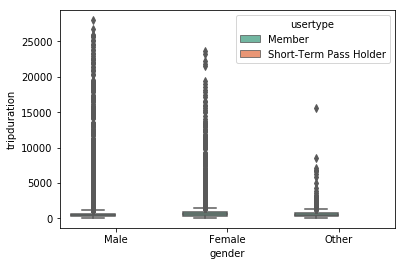

In [32]:
# Grouped boxplot
sns.boxplot(x="gender", y="tripduration", hue="usertype",data=data, palette="Set2")
plt.show()

In [33]:
data.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,starttime_mod,starttime_date,starttime_year,starttime_month,starttime_day,starttime_hour
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0,2014-10-13 10:31:00,2014-10-13,2014,10,13,10
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0,2014-10-13 10:32:00,2014-10-13,2014,10,13,10
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0,2014-10-13 10:33:00,2014-10-13,2014,10,13,10
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0,2014-10-13 10:34:00,2014-10-13,2014,10,13,10
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0,2014-10-13 10:34:00,2014-10-13,2014,10,13,10


In [34]:
mean_trip_duration = np.mean([x for x in trip_duration if q75+(1.5*iqr) >=x>= q25-(1.5*iqr)])
upper_whisker = q75+(1.5*iqr)
print('Mean of trip duration (exclude outliners): %f'%mean_trip_duration)

Mean of trip duration (exclude outliners): 711.726573


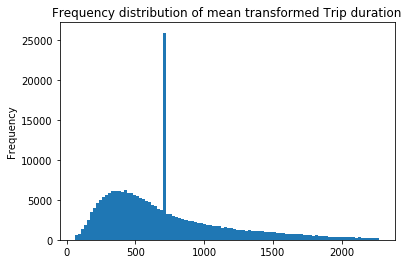

In [35]:
def transform_tripduration(x):
    
    if x > upper_whisker:
        return mean_trip_duration
    return x

data['tripduration_mean'] = data['tripduration'].apply(lambda x: transform_tripduration(x))

data['tripduration_mean'].plot.hist(bins=100, title='Frequency distribution of mean transformed Trip duration')
plt.show()

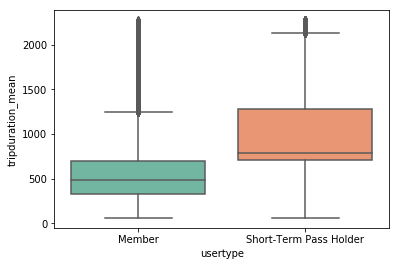

In [36]:
# Grouped after treated outline boxplot
sns.boxplot(x="usertype", y="tripduration_mean", data=data, palette="Set2")
plt.show()

In [37]:
for cat in ['gender','usertype']:

    print('Category: %s\n'%cat)
    groupby_category = data.groupby(['starttime_hour', cat])['tripduration_mean'].sum().unstack(cat)
    groupby_category = groupby_category.dropna()
    category_names = list(groupby_category.columns)

    for comb in [(category_names[i],category_names[j]) for i in range(len(category_names)) for j in range(i+1, len(category_names))]:

        print('%s %s'%(comb[0], comb[1]))
        t_statistics = stats.ttest_ind(list(groupby_category[comb[0]]), list(groupby_category[comb[1]]))
        print('Statistic: %f, P value: %f'%(t_statistics.statistic, t_statistics.pvalue))
        print('\n')

Category: gender

Female Male
Statistic: -3.695469, P value: 0.000604


Female Other
Statistic: 5.205317, P value: 0.000005


Male Other
Statistic: 5.583837, P value: 0.000001


Category: usertype

Member Short-Term Pass Holder
Statistic: -0.317519, P value: 0.752287




### FINISH